In [ ]:
#Per ekzekutimin e modeleve te Neural Networks eshte e nevojshme instalimi i librarive me poshte:
# pip install keras

# pip install tensorflow
#ose
# !conda install -c conda-forge tensorflow

In [1]:
# Importimi i librarive të nevojshme
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Leximi i iris.arff file
data, meta = arff.loadarff('./dataset/iris.arff')

# Konvertimi i të dhënave ARFF në Pandas DataFrame
df = pd.DataFrame(data)

In [3]:
# Shfaqja e 5 rreshtave të parë të dataframe
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'
4,5.0,3.6,1.4,0.2,b'Iris-setosa'


In [4]:
# Shfaqja e 5 rreshtave të fundit të dataframe
df.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,b'Iris-virginica'
146,6.3,2.5,5.0,1.9,b'Iris-virginica'
147,6.5,3.0,5.2,2.0,b'Iris-virginica'
148,6.2,3.4,5.4,2.3,b'Iris-virginica'
149,5.9,3.0,5.1,1.8,b'Iris-virginica'


In [5]:
# Shfaqja e vlerave unike të atributit class që përfaqëson llojin e lules Iris
unique_labels = df['class'].unique()
print(unique_labels)

[b'Iris-setosa' b'Iris-versicolor' b'Iris-virginica']


In [6]:
# Kontrollimi i vlerave null të seciles kolonë
# Vlerat null duhet kontrolluar pasi që modelet nuk mund të trajnohen me atribute që nuk kanë vlera
null_values = df.isnull()
null_counts = null_values.sum()
print(null_counts)

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64


In [7]:
# Printimi i tipeve të të dhënave të dataframe
print(df.dtypes)

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object


In [8]:
# Dekodimi i atributit class nga byte litaral në string
# Për detyrat e klasifikimit atributi target zakonisht është integer ose string 
df['class'] = df['class'].str.decode('utf-8')

In [9]:
# Ndarja e atributeve të pavarura dhe të varura
# 'sepallength', 'sepalwidth', 'petallength', 'petalwidth' do të përdoren për mësimin e modelit ashtu që në bazë të tyre algoritmi
# të jetë në gjendje të klasifikoj të dhënat e panjohura
# class është atributi që do të predikohet
X = df[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
y = df['class']

# Ndarja e të dhënave në të dhëna trajnuese dhe testuese
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
class_names_list = df["class"].unique().tolist()

In [11]:
# https://realpython.com/knn-python/

# Krijimi i një klasifikuesi k-NN
k = 5  # Zgjedhja e një numri k (numri i fqinjëve)
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Trajnimi (fit) i algoritmit duke përdorur të dhënat e trajnimit
knn_classifier.fit(X_train, y_train)

# Predikimi i targetit përmes të dhënave testuese
y_pred = knn_classifier.predict(X_test)

# Llogaritja e saktësisë së algoritmit duke krahasuar targetin parashikuara me të dhënat e vërteta
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



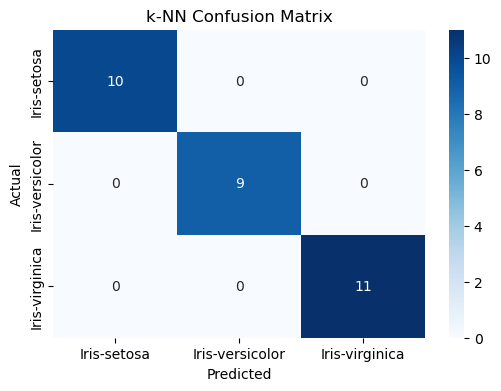

In [12]:
# Llojaritja e confusion matrix
knn_conf_matrix = confusion_matrix(y_test, y_pred)

# Krijimi i një heatmap për confusion matrix të llogaritur
plt.figure(figsize=(6, 4))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_list, yticklabels=class_names_list)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('k-NN Confusion Matrix')
plt.show()

In [13]:
# Krijimi një klasifikuesi Decision Tree
classifier = DecisionTreeClassifier(random_state=42)

# Trajnimi (fit) i algoritmit duke përdorur të dhënat e trajnimit
classifier.fit(X_train, y_train)

# Predikimi i targetit përmes të dhënave testuese
y_pred = classifier.predict(X_test)

# Llogaritja e saktësisë së algoritmit duke krahasuar targetin parashikuara me të dhënat e vërteta
accuracy = accuracy_score(y_test, y_pred)

# Printimi i saktësisë së llogaritur
print("Accuracy:", accuracy)

# Gjenerimi i një raporti klasifikimi që tregon metrikat e ndryshme
print(classification_report(y_test, y_pred))


Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



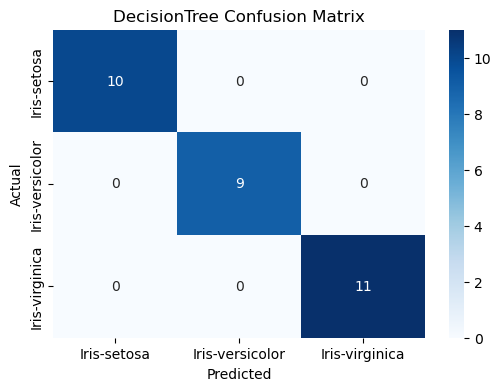

In [14]:
# https://seaborn.pydata.org/tutorial/color_palettes.html

# Llojaritja e confusion matrix
dt_conf_matrix = confusion_matrix(y_test, y_pred)

# Krijimi i një heatmap për confusion matrix të llogaritur
plt.figure(figsize=(6, 4))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_list, yticklabels=class_names_list)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DecisionTree Confusion Matrix')
plt.show()


In [15]:
# Klasa për konvertimin e etiketave të klasave nga string në integer
label_encoder = LabelEncoder()

# Konvertimi i etiketave të klasave të trajnimit në numra të plotë
# Kur përdoren rrjetet neurale për detyra klasifikimi, variabla e varur (vlerat y) shpesh kodohen si numra të plotë, 
# p.sh kur përdoret funksioni i humbjes sparse_categorical_crossentropy.
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Krijimi i një instance StandardScaler për shkallëzim (standardizim)
scaler = StandardScaler()

# Përdor metoden fit_transform për të llogaritur shkallën e shkallëzimit dhe
# transformuar të dhënat e trajnuese (X_train) në një formë të standardizuar
X_train_scaled = scaler.fit_transform(X_train)

# Përdor metoden transform për të përdorur shkallën e shkallëzimit që është
# llogaritur në të dhënat testuese (X_test)
X_test_scaled = scaler.transform(X_test)


# Krijo modelin e parë Sequential()
model_1 = Sequential()

# Shto shtresën e hyrjes
model_1.add(Dense(units=8, activation='relu', input_dim=X_train_scaled.shape[1]))

# Shto një shtresë fshehtë
model_1.add(Dense(units=4, activation='relu'))

# Shto shtresën e daljes
model_1.add(Dense(units=len(np.unique(y)), activation='softmax'))

# Kompajllimi i modelit të parë
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printo një përmbledhje të modelit
model_1.summary()

# Trajno modelin e parë
history_1 = model_1.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, validation_split=0.1, verbose=2)

# Përdor metoden 'evaluate' për të llogaritur humbjen dhe saktësinë në testim
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_encoded)
print("Humbja në Testim:", test_loss)
print("Saktesia në Testim:", test_accuracy)

# Përdor metoden 'predict' për të marrë probabilitetet e parashikuara
y_pred_probs = model_1.predict(X_test_scaled)

# Konverto probabilitetet e parashikuara në etiketa të klasave
y_pred = np.argmax(y_pred_probs, axis=1)

# Printo raportin e klasifikimit dhe matricën
print(classification_report(y_test_encoded, y_pred))
print(confusion_matrix(y_test_encoded, y_pred))


# Krijo modelin e dytë Sequential()
model_2 = Sequential()

# Shto shtresën e hyrjes
model_2.add(Dense(units=8, activation='relu', input_dim=X_train_scaled.shape[1]))

# Shto shumë shtresa fshehtë (ka më shumë shtresa se sa modeli 1)
model_2.add(Dense(units=16, activation='relu'))
model_2.add(Dense(units=8, activation='relu'))

# Shto shtresën e daljes
model_2.add(Dense(units=len(np.unique(y)), activation='softmax'))

# Kompajllimi i modelit të dytë
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printo një përmbledhje të modelit
model_2.summary()

# Trajno modelin e dytë
history_2 = model_2.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, validation_split=0.1, verbose=2)

# Përdor metoden 'evaluate' për të llogaritur humbjen dhe saktësinë në testim
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test_scaled, y_test_encoded)
print("Humbja në Testim:", test_loss_2)
print("Saktesia në Testim:", test_accuracy_2)

# Përdor metoden 'predict' për të marrë probabilitetet e parashikuara
y_pred_probs_2 = model_2.predict(X_test_scaled)

# Konverto probabilitetet e parashikuara në etiketa të klasave
y_pred_2 = np.argmax(y_pred_probs_2, axis=1)

# Printo raportin e klasifikimit dhe matricën
print(classification_report(y_test_encoded, y_pred_2))
print(confusion_matrix(y_test_encoded, y_pred_2))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
11/11 - 2s - loss: 1.1096 - accuracy: 0.1574 - val_loss: 1.1055 - val_accuracy: 0.2500 - 2s/epoch - 142ms/step
Epoch 2/50
11/11 - 0s - loss: 1.0737 - accuracy: 0.3889 - val_loss: 1.0883 - val_accuracy: 0.2500 - 110ms/epoch - 10ms/step
Epoch 3/50
11/11 - 0s - loss: 1.0452 -

 dense_6 (Dense)             (None, 3)                 27        
                                                                 
Total params: 347 (1.36 KB)
Trainable params: 347 (1.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
11/11 - 1s - loss: 1.2394 - accuracy: 0.0278 - val_loss: 1.1677 - val_accuracy: 0.0000e+00 - 1s/epoch - 115ms/step
Epoch 2/50
11/11 - 0s - loss: 1.1643 - accuracy: 0.1019 - val_loss: 1.1257 - val_accuracy: 0.0000e+00 - 66ms/epoch - 6ms/step
Epoch 3/50
11/11 - 0s - loss: 1.0981 - accuracy: 0.3426 - val_loss: 1.0886 - val_accuracy: 0.2500 - 63ms/epoch - 6ms/step
Epoch 4/50
11/11 - 0s - loss: 1.0423 - accuracy: 0.5093 - val_loss: 1.0548 - val_accuracy: 0.4167 - 63ms/epoch - 6ms/step
Epoch 5/50
11/11 - 0s - loss: 0.9889 - accuracy: 0.5370 - val_loss: 1.0205 - val_accuracy: 0.5833 - 62ms/epoch - 6ms/step
Epoch 6/50
11/11 - 0s - loss: 0.9374 - accuracy: 0.5648 - val_loss: 0.9827 - val_accurac